In [37]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm, skew

In [38]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
aList = list(train.dtypes)
categorical_columns = list( train.select_dtypes(include=['object']).columns )
numerical_columns = list( train.select_dtypes(include=['int64']).columns )
print("Number of continous features", len(numerical_columns))
print("Number of Categorical features", len(categorical_columns))
print("Total Features", len(list(train.columns)))
target=train['SalePrice']
droppedCols = []

Number of continous features 36
Number of Categorical features 43
Total Features 82


In [39]:
train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [40]:
train.columns.values

array(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

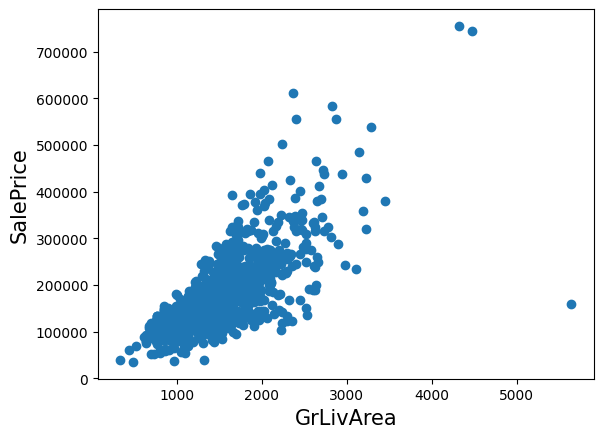

In [41]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

C:\Users\drew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


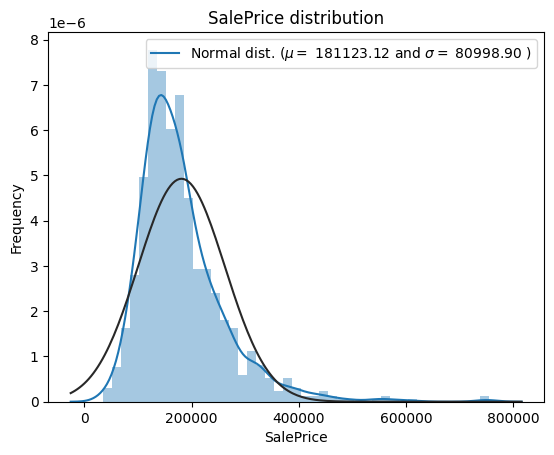

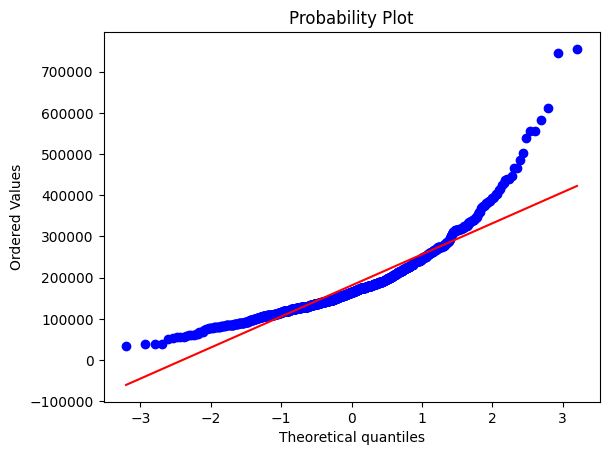

In [42]:
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# combining the data so we don't have to clean it twice. 

In [43]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1460, 80)


# missing values

In [44]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


We fill the missing values by 0 if the type of the input is an integer, and we fill ‘None’ if it’s categorical.

In [45]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' ):
    all_data[col] = all_data[col].fillna('None')

For the following input variables, we fill the missing values with the most frequent value. Notice that the variable LotFrontage is of type “float”. In general, the LotFrontage of a house is more or less equal to the Neighborhood houses. Hence we group the data by “Neighborhood” and fill the missing values with a median value of the neighborhood houses.

In [46]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

the ‘Utilities’ column, almost all the columns have the same value “AllPub

In [47]:
all_data = all_data.drop(['Utilities'], axis=1)

replace missing values with Typ

In [48]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

no more missing values!

In [49]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


change from object to str

In [50]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

area is important so combine these features

In [51]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

new dataframe

In [52]:
df = all_data[:ntrain]
df['SalePrice'] = y_train
df.head()

C:\Users\drew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,SalePrice
0,64,60,RL,70.0,9375,Pave,None,Reg,Lvl,Inside,...,None,GdPrv,None,0,2,2009,WD,Normal,3091,219500
1,651,70,RL,60.0,9084,Pave,None,Reg,Lvl,Inside,...,None,MnPrv,None,0,10,2009,WD,Normal,2265,108000
2,260,80,RL,120.0,19296,Pave,None,Reg,Lvl,Corner,...,None,GdWo,None,0,5,2009,WD,Normal,2744,176000
3,1089,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,Inside,...,None,None,None,0,4,2006,WD,Normal,2494,197000
4,1112,20,RL,73.0,7100,Pave,None,IR1,Lvl,Corner,...,None,None,None,0,7,2006,WD,Normal,1632,129900


get correlated features, see eda1

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

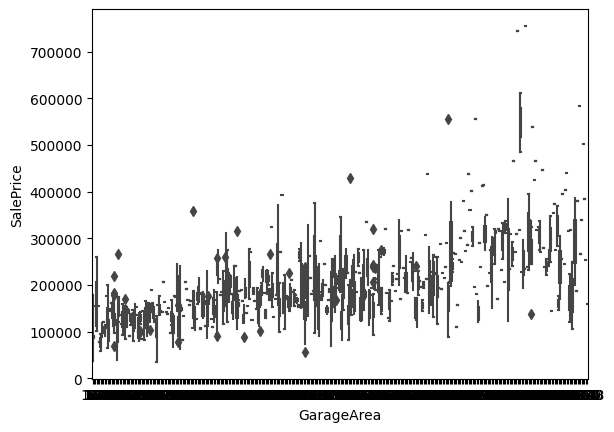

In [53]:
sns.boxplot(y='SalePrice', x = 'GarageArea', data=df)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

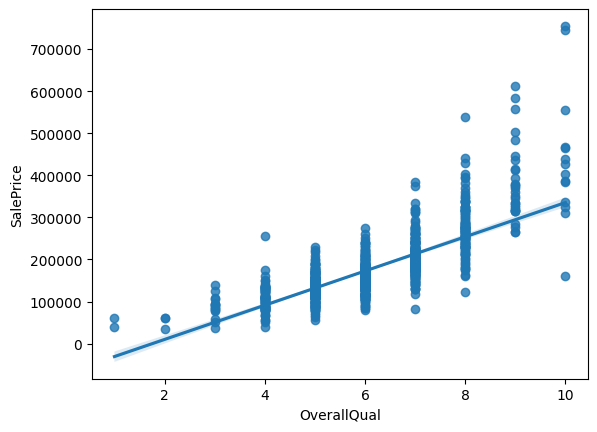

In [54]:
sns.regplot(x='OverallQual', y='SalePrice', data=df, robust=True)

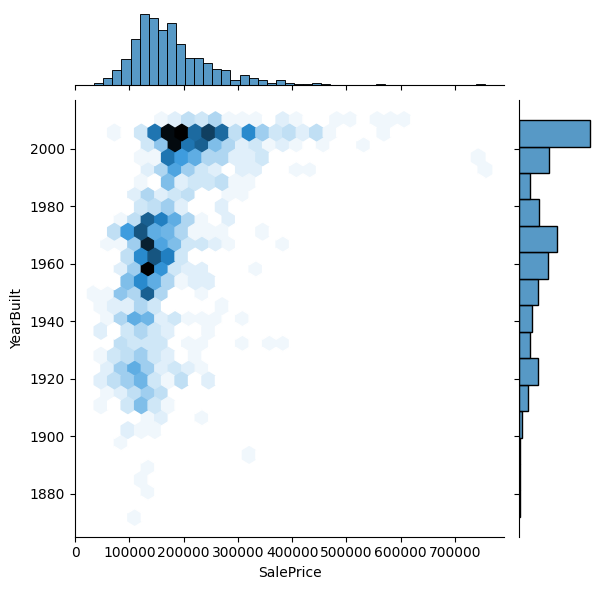

In [55]:
sns.jointplot(x='SalePrice', y='YearBuilt', data=df, kind='hex')

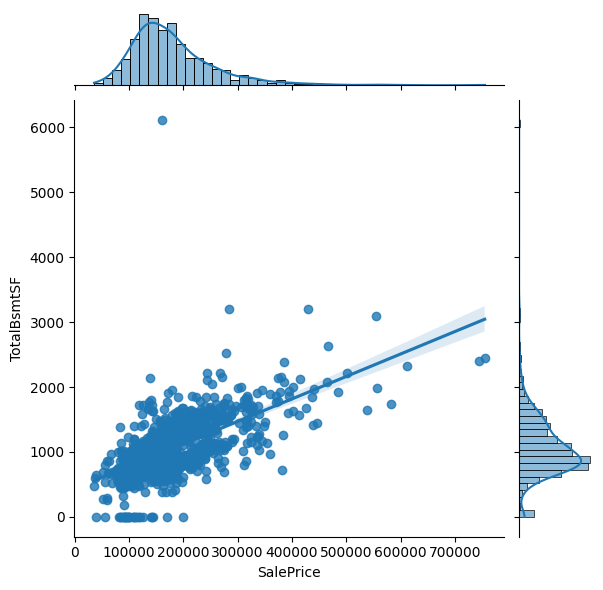

In [56]:
sns.jointplot(x='SalePrice', y='TotalBsmtSF', data=df, kind='reg')

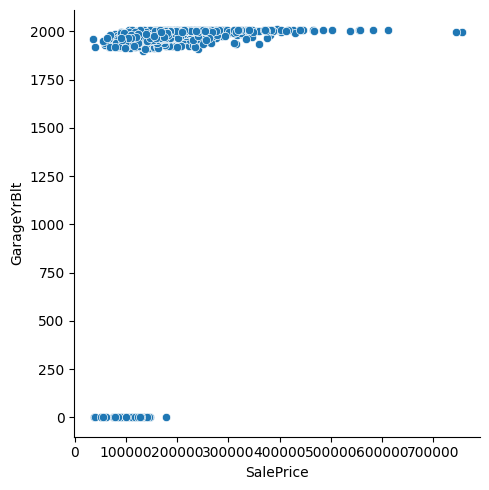

In [57]:
sns.relplot(x='SalePrice', y='GarageYrBlt', data=df)

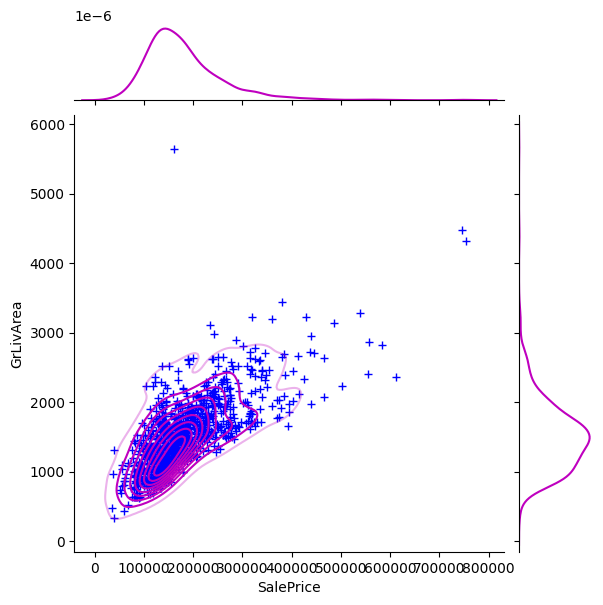

In [58]:
g = sns.jointplot(x='SalePrice', y='GrLivArea', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='+' )
g.ax_joint.collections[0].set_alpha(0.3)

**TODO**: Remove all the bivariate plots below

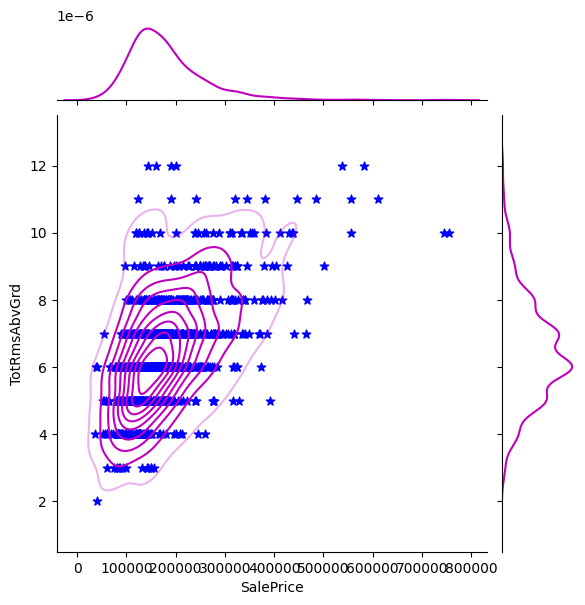

In [59]:
g = sns.jointplot(x='SalePrice', y='TotRmsAbvGrd', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='*' )
g.ax_joint.collections[0].set_alpha(0.3)

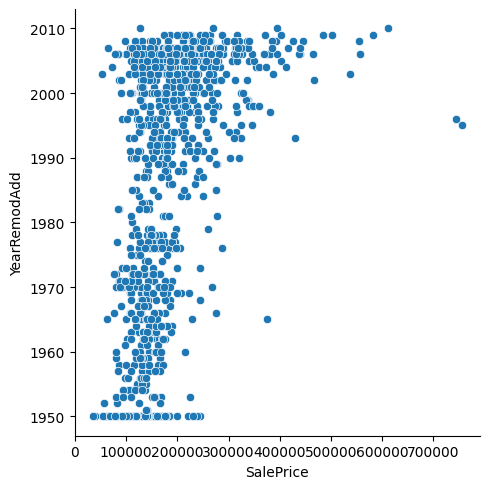

In [60]:
sns.relplot(x='SalePrice', y='YearRemodAdd', data=df)

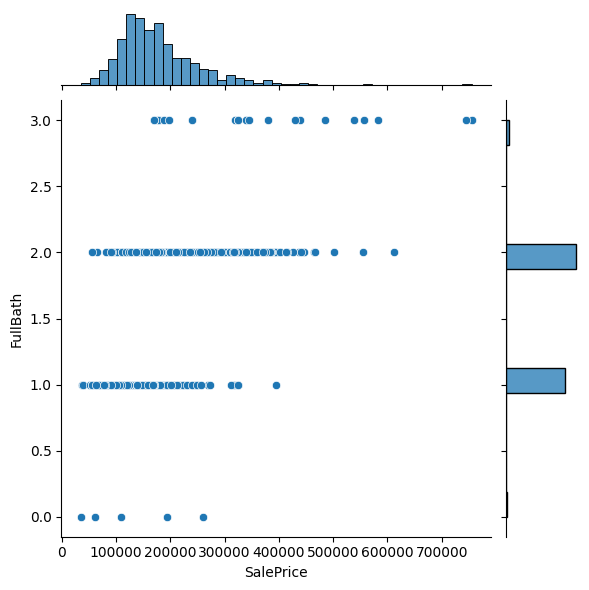

In [61]:
sns.jointplot(x='SalePrice', y='FullBath', data=df)

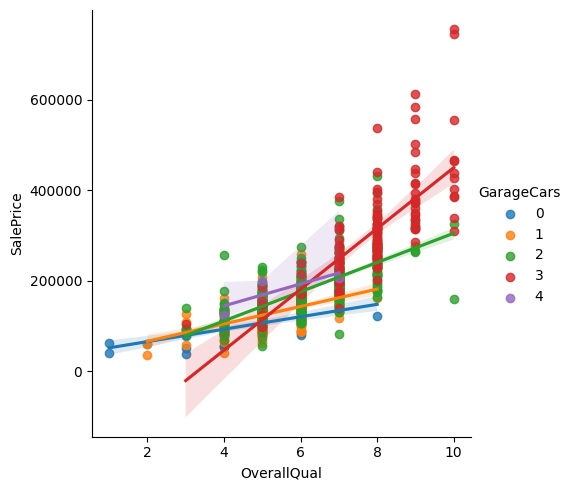

In [62]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, hue= 'GarageCars')

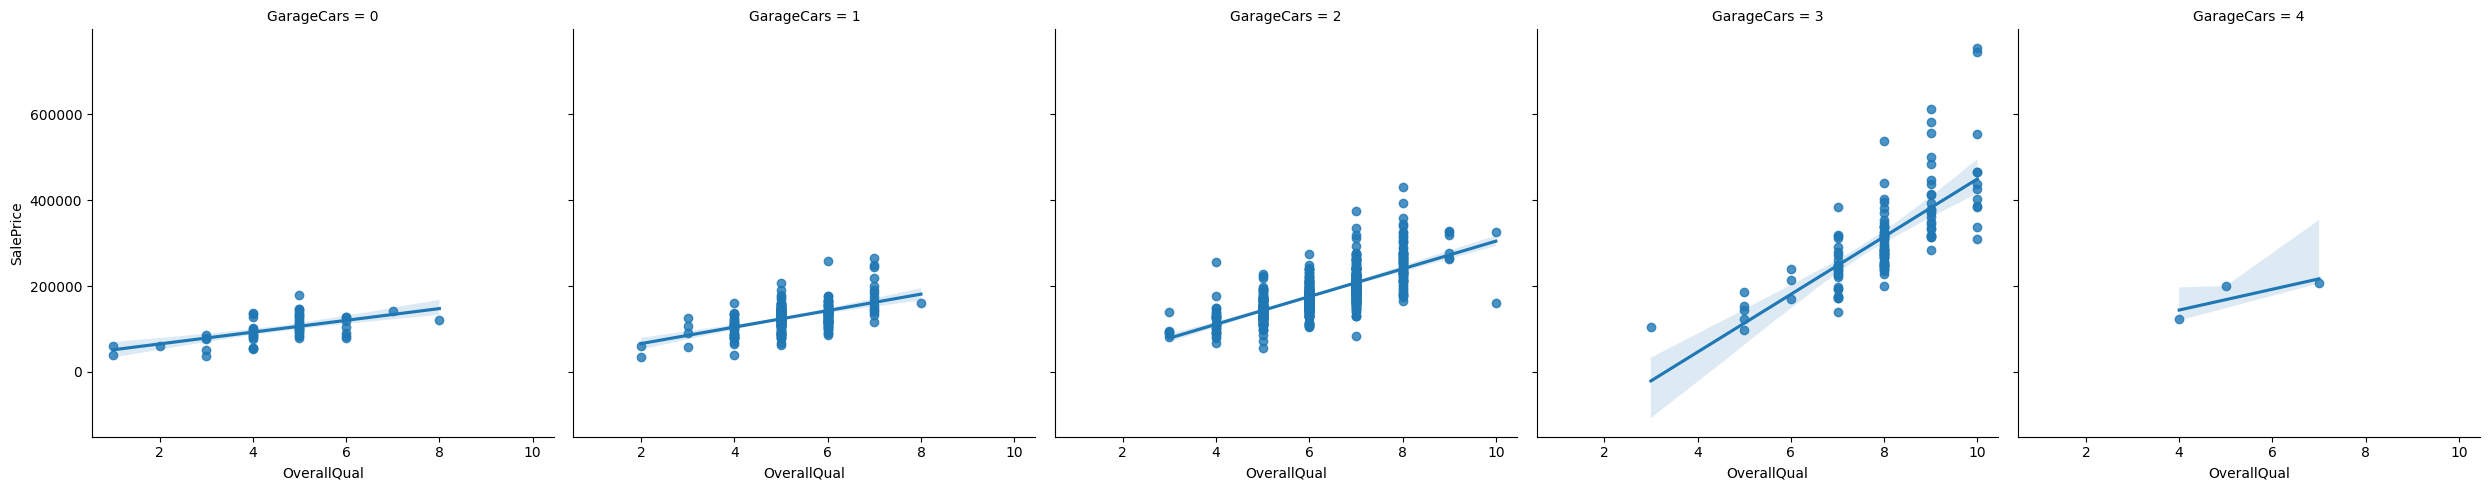

In [63]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, col= 'GarageCars')

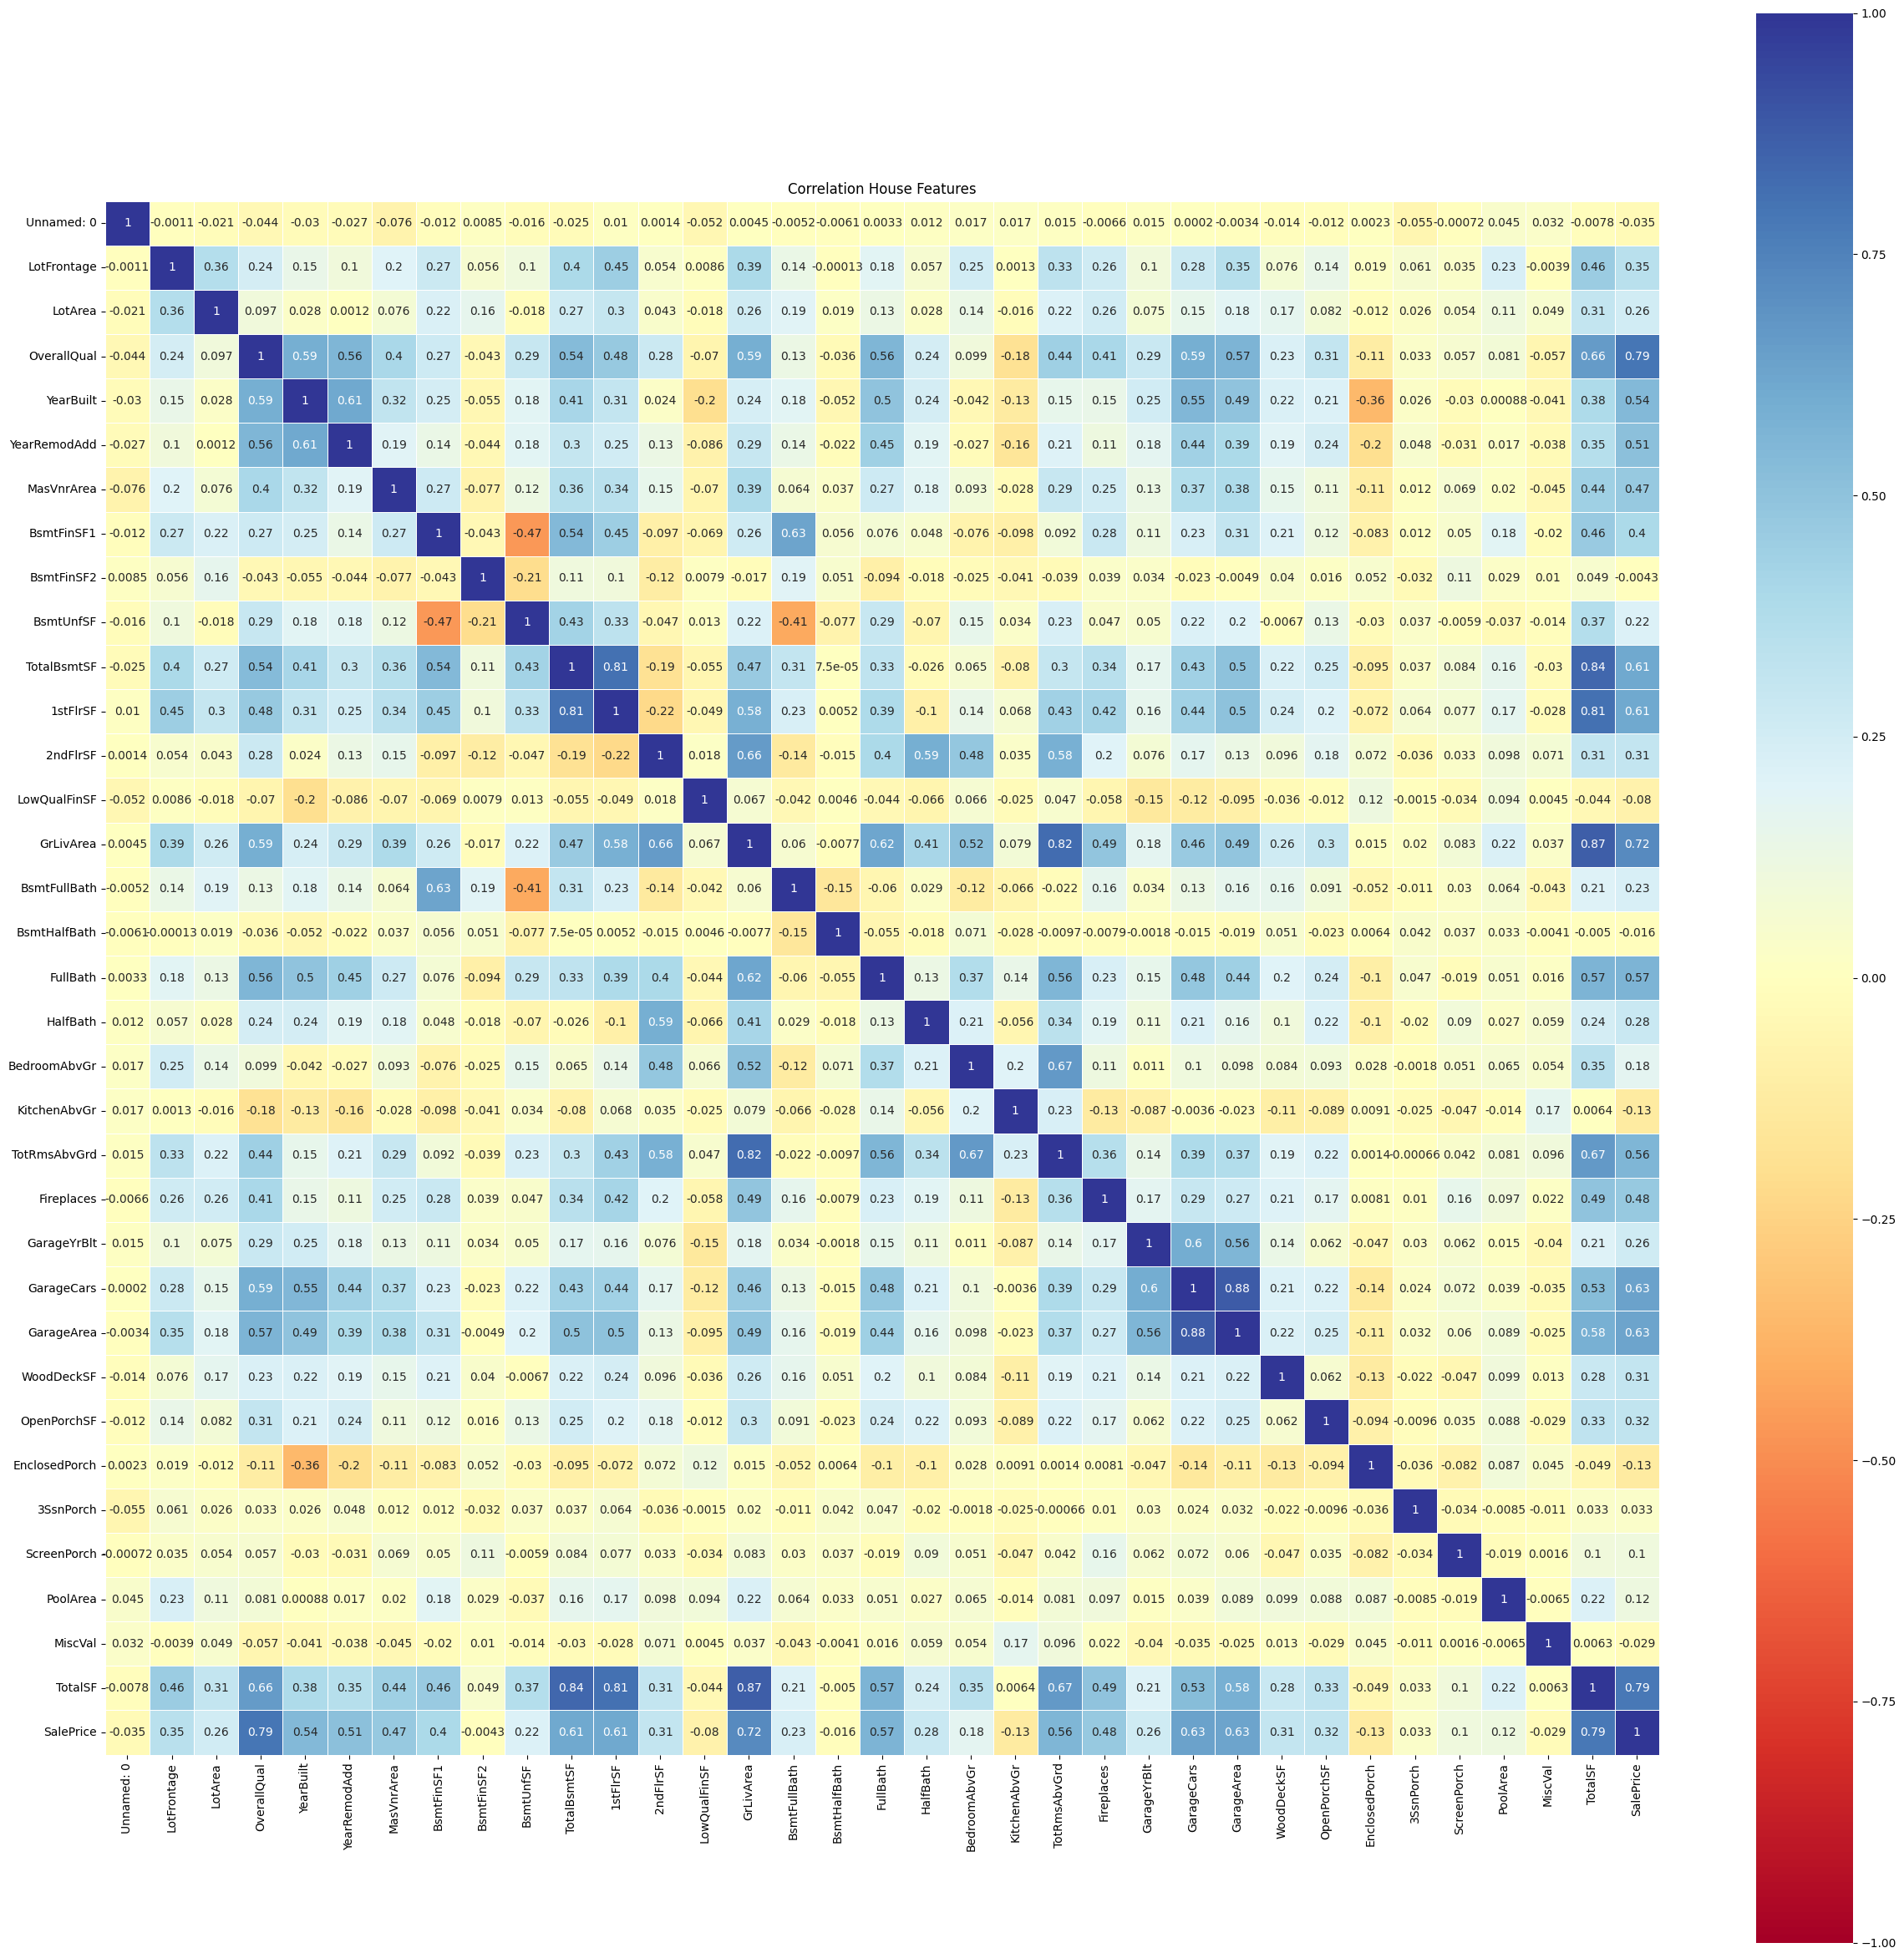

In [64]:
#Get dataframe of only numberic columns
dfnumeric = df._get_numeric_data()
corrmat = dfnumeric.corr()

f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(corrmat, vmin = -1, vmax = 1, square=True, annot = True, cmap = 'RdYlBu', linewidths =.5)
plt.title('Correlation House Features')

plt.show();

In [65]:
high_corrs = corrmat['SalePrice'].sort_values(ascending=False)

high_corrs

SalePrice        1.000000
OverallQual      0.789634
TotalSF          0.785196
GrLivArea        0.719985
GarageCars       0.634395
GarageArea       0.626319
TotalBsmtSF      0.612676
1stFlrSF         0.611725
FullBath         0.570163
TotRmsAbvGrd     0.555989
YearBuilt        0.542773
YearRemodAdd     0.510283
Fireplaces       0.475610
MasVnrArea       0.469071
BsmtFinSF1       0.398335
LotFrontage      0.346356
OpenPorchSF      0.317960
2ndFlrSF         0.308750
WoodDeckSF       0.308526
HalfBath         0.284235
GarageYrBlt      0.260569
LotArea          0.257302
BsmtFullBath     0.226761
BsmtUnfSF        0.218188
BedroomAbvGr     0.175139
PoolArea         0.116425
ScreenPorch      0.103018
3SsnPorch        0.032842
BsmtFinSF2      -0.004278
BsmtHalfBath    -0.015511
MiscVal         -0.029293
Unnamed: 0      -0.035452
LowQualFinSF    -0.079848
EnclosedPorch   -0.128401
KitchenAbvGr    -0.132590
Name: SalePrice, dtype: float64

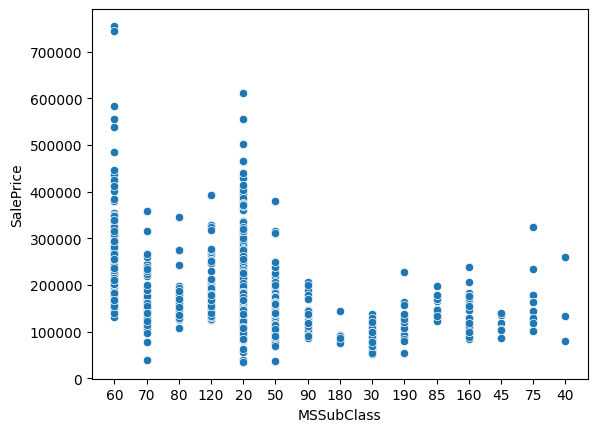

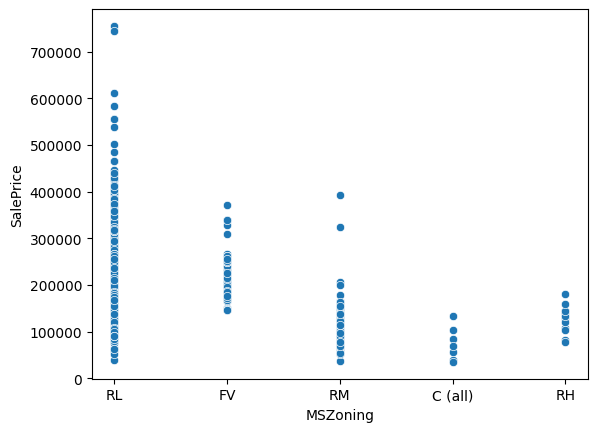

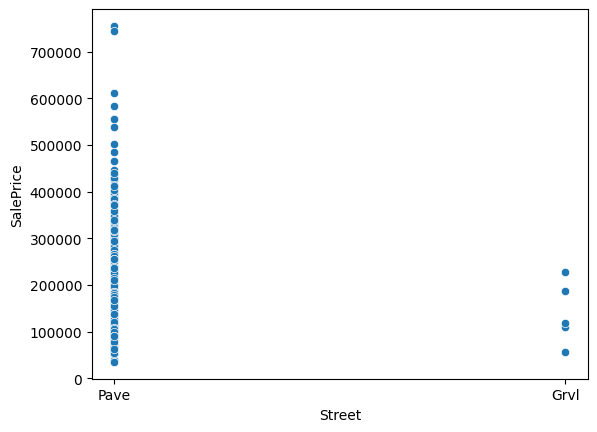

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [66]:
#Generate Plot of all Categorical Columns 

df_cat = df.select_dtypes(include=['object'])

for col in df_cat:
    sns.scatterplot( x = df_cat[col], y = df['SalePrice'])
    plt.show()

In [ ]:
dfnumeric_std = (dfnumeric-dfnumeric.mean())/dfnumeric.std()

dfnumeric_std.drop(["SalePrice"], inplace=True, axis = 1)

In [ ]:
# Convert categorical variables to dummy variables

df_dummy = pd.get_dummies(df)
df_dummy.head()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,64,70.0,9375,7,1997,1998,573.0,739,0,318,...,0,0,0,1,0,0,0,0,1,0
1,651,60.0,9084,4,1940,1950,0.0,0,0,755,...,0,0,0,1,0,0,0,0,1,0
2,260,120.0,19296,6,1962,1962,399.0,672,690,0,...,0,0,0,1,0,0,0,0,1,0
3,1089,37.0,3316,8,2005,2005,0.0,1039,0,208,...,0,0,0,1,0,0,0,0,1,0
4,1112,73.0,7100,5,1957,1957,0.0,708,0,108,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()

min_max_np = min_max_scaler.fit_transform(df_dummy.to_numpy())

min_max_df = pd.DataFrame(min_max_np, columns= df_dummy.columns)

min_max_df.head()

,Unnamed: 0,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.043866,0.167808,0.036947,0.666667,0.905797,0.800000,0.358125,0.130936,0.000000,0.136130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.446196,0.133562,0.035585,0.333333,0.492754,0.000000,0.000000,0.000000,0.000000,0.323202,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.178204,0.339041,0.083357,0.555556,0.652174,0.200000,0.249375,0.119064,0.612245,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.746402,0.054795,0.008603,0.777778,0.963768,0.916667,0.000000,0.184089,0.000000,0.089041,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.762166,0.178082,0.026304,0.444444,0.615942,0.116667,0.000000,0.125443,0.000000,0.046233,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Perform Standard Scaling on df_dummy

standard_scaler = StandardScaler()

standard_np = standard_scaler.fit_transform(df_dummy.to_numpy())

standard_df = pd.DataFrame(standard_np, columns= df_dummy.columns
standard_df.head()

SyntaxError: invalid syntax (1690458510.py, line 8)